## PROBLEM STATEMENT

#### A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car

## GOAL 
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### reference kaggle nb: https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe/notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cars = pd.read_csv('CarPrice_Assignment.csv')
pd.set_option('display.max_columns', None)
cars.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


# Understanding the dataset

In [5]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
cars.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### We want the company names of the cars as well as it is an important information so we will extract that.

In [178]:
companyname = cars.CarName.apply(lambda x : x.split(' ')[0])

* The apply() function is used to apply a function to each value in the "CarName" column.
* The lambda function lambda x: x.split(' ')[0] is defined to split each value in the "CarName" column by whitespace (' ') and extract the first word.
    * x represents each individual value in the "CarName" column.
    * x.split(' ') splits the value into a list of substrings using whitespace as the delimiter.
    * [0] retrieves the first element (i.e., the first word) from the resulting list.

In [179]:
cars.insert(3, "CompanyName", companyname)

In [180]:
cars.drop(['CarName'], axis = 1, inplace = True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [181]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [182]:
def replace_name(a, b, inplace = True):
    cars.CompanyName.replace(a, b, inplace = True)
    
replace_name('maxda', 'mazda')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')

In [168]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Visualizing data

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Car Price Spread'}, ylabel='price'>

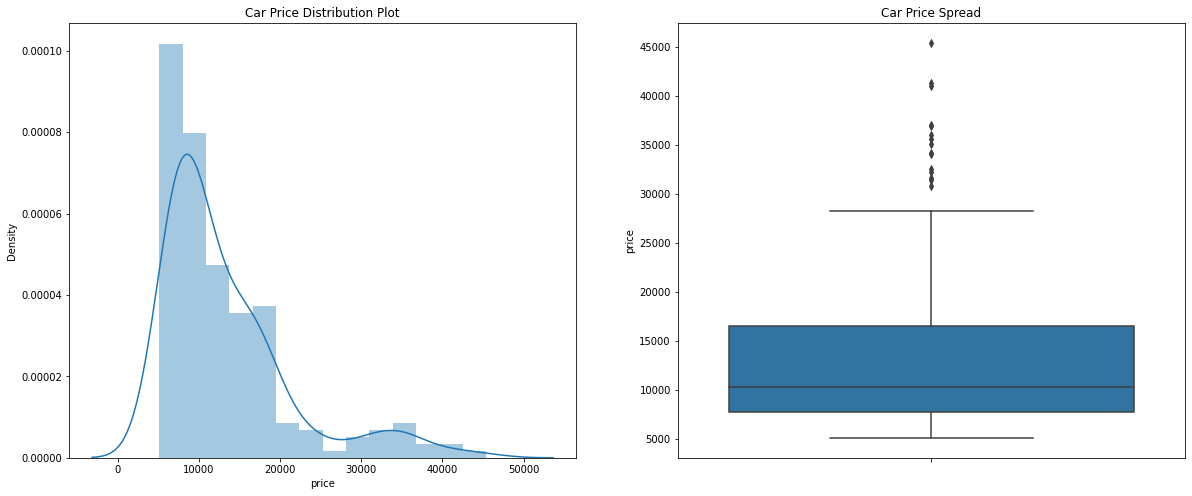

In [29]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1, 2, 2)
plt.title('Car Price Spread')
sns.boxplot(y = cars.price)

In [30]:
cars.price.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

### Inference: 
* Plot is right skewed, which implies that most of the price are below 15000
* Significant difference between the mean and median of price
* The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

## Categorical data

In [31]:
cars.dtypes

car_ID                int64
symboling             int64
CompanyName          object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

### only the object dtypes are categorical columns

In [32]:
cars.select_dtypes(include=['object', 'category']).columns

Index(['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [41]:
cars.CompanyName.value_counts()

toyota         32
mazda          17
nissan         17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Nissan          1
Name: CompanyName, dtype: int64

Text(0.5, 1.0, 'Companies')

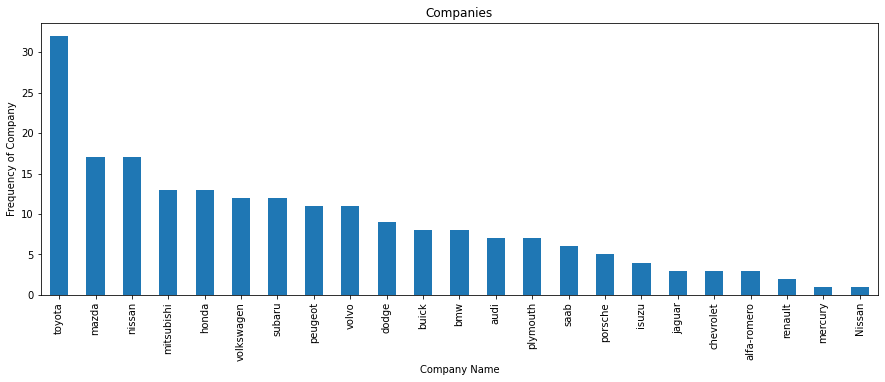

In [59]:
plt.figure(figsize = (15, 5))
cars.CompanyName.value_counts().plot(kind='bar')
plt.xlabel('Company Name')
plt.ylabel('Frequency of Company')
plt.title('Companies')

* toyota seems to be the fav car company

In [60]:
cars.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

Text(0.5, 1.0, 'Fuel types among the cars')

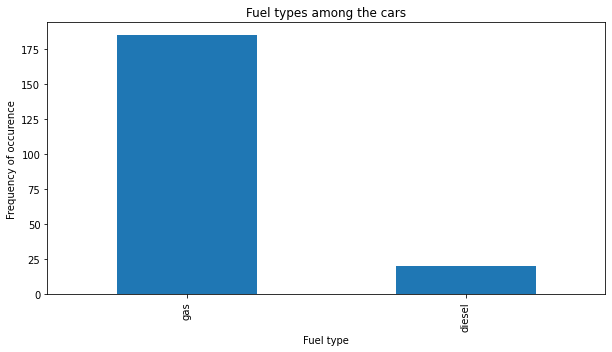

In [68]:
plt.figure(figsize=(10, 5))
cars.fueltype.value_counts().plot(kind = 'bar')
plt.xlabel('Fuel type')
plt.ylabel('Frequency of occurence')
plt.title("Fuel types among the cars")

* gas type is more

In [71]:
cars.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

Text(0.5, 1.0, 'Car Type')

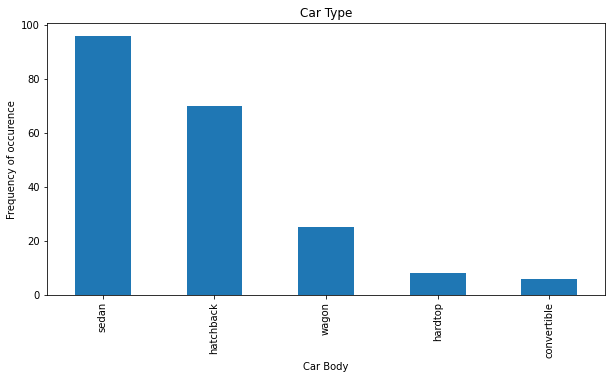

In [73]:
plt.figure(figsize=(10, 5))
cars.carbody.value_counts().plot(kind = 'bar')
plt.xlabel('Car Body')
plt.ylabel('Frequency of occurence')
plt.title("Car Type")

* sedan is the most prefered

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'symboling vs price distribution'}, xlabel='symboling', ylabel='price'>

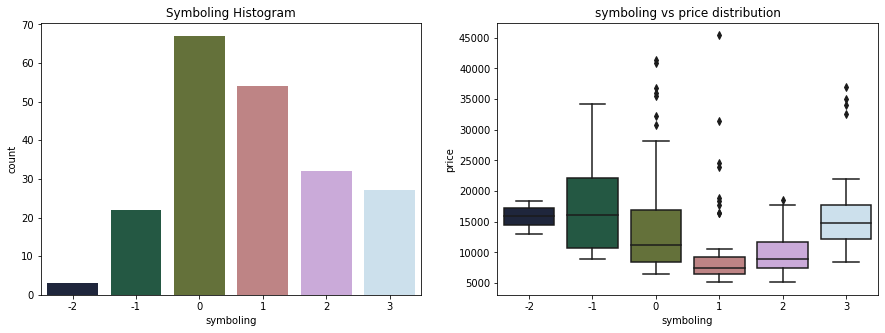

In [89]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title("Symboling Histogram")
sns.countplot(cars.symboling, palette = ("cubehelix"))

plt.subplot(1, 2, 2)
plt.title("symboling vs price distribution")
sns.boxplot(x = cars.symboling, y = cars.price, palette = ('cubehelix'))

* cars with symboling rating 0 are the most prefered
* price dip at symboling rating 1
* cars with symboling rating -1 seem to have higher prices (-1 is good rating)
* price range of -2 and 3 are similar

In [90]:
cars.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Enginetype vs price'}, xlabel='enginetype', ylabel='price'>

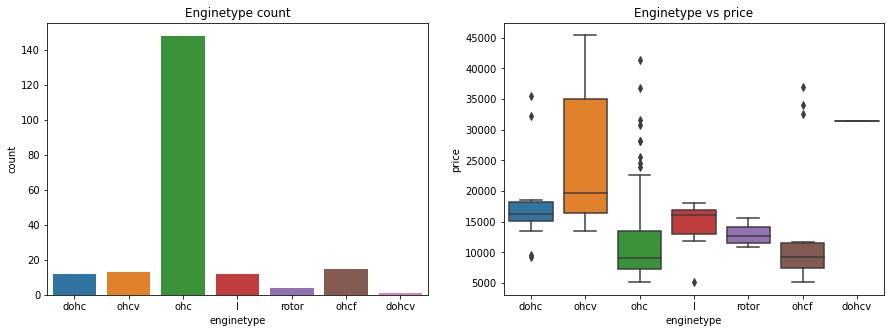

In [95]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Enginetype count')
sns.countplot(cars.enginetype)

plt.subplot(1, 2, 2)
plt.title('Enginetype vs price')
sns.boxplot(x = cars.enginetype, y = cars.price)

* ohc is the most sold by far, has a low price range
* ohcf and ohc have the lowest price range
* ohcv has the highest price range 

In [96]:
cars.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

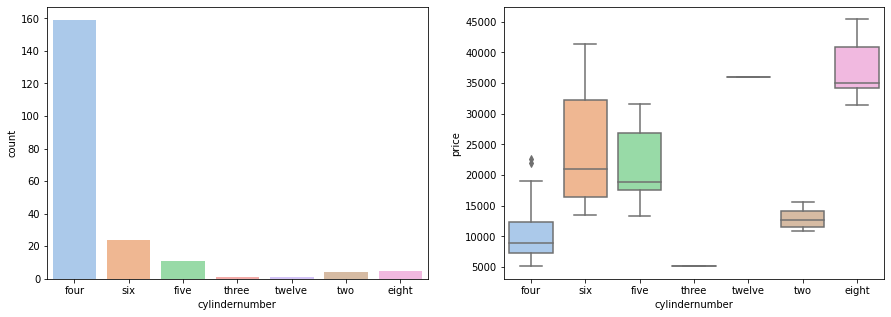

In [103]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
sns.countplot(cars.cylindernumber, palette = ('pastel'))

plt.subplot(1, 2, 2)
sns.boxplot(x = cars.cylindernumber, y = cars.price, palette = ('pastel'))

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

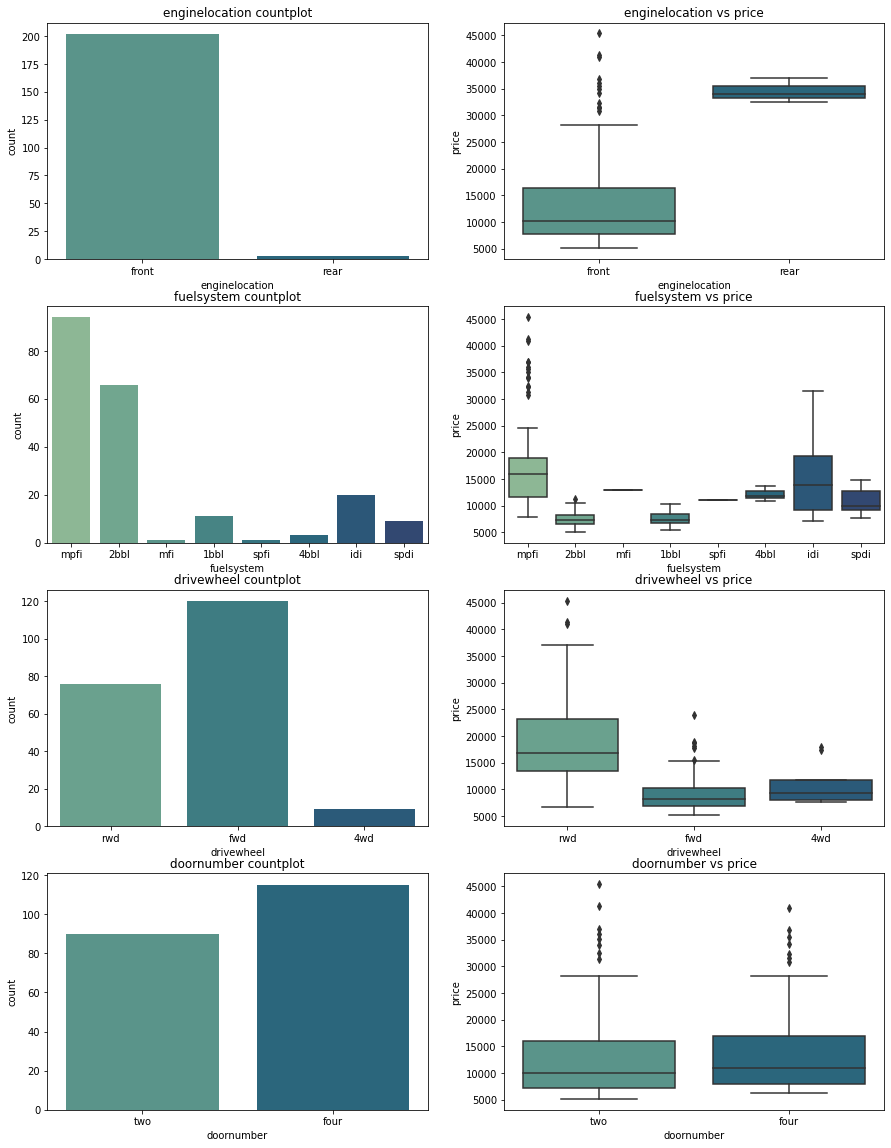

In [111]:
def cat_plot(x, fig):
    plt.subplot(4, 2, fig)
    plt.title(x+ ' countplot')
    sns.countplot(cars[x], palette = ('crest'))
    
    plt.subplot(4, 2, (fig+1))
    plt.title(x + ' vs price')
    sns.boxplot(x = cars[x], y = cars.price, palette = ('crest'))
    
plt.figure(figsize = (15, 20))


cat_plot('enginelocation', 1)
cat_plot('fuelsystem', 3)
cat_plot('drivewheel', 5)
cat_plot('doornumber', 7)

## Visualizing numerical data

In [116]:
cars.select_dtypes(include=['int64', 'float64']).columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

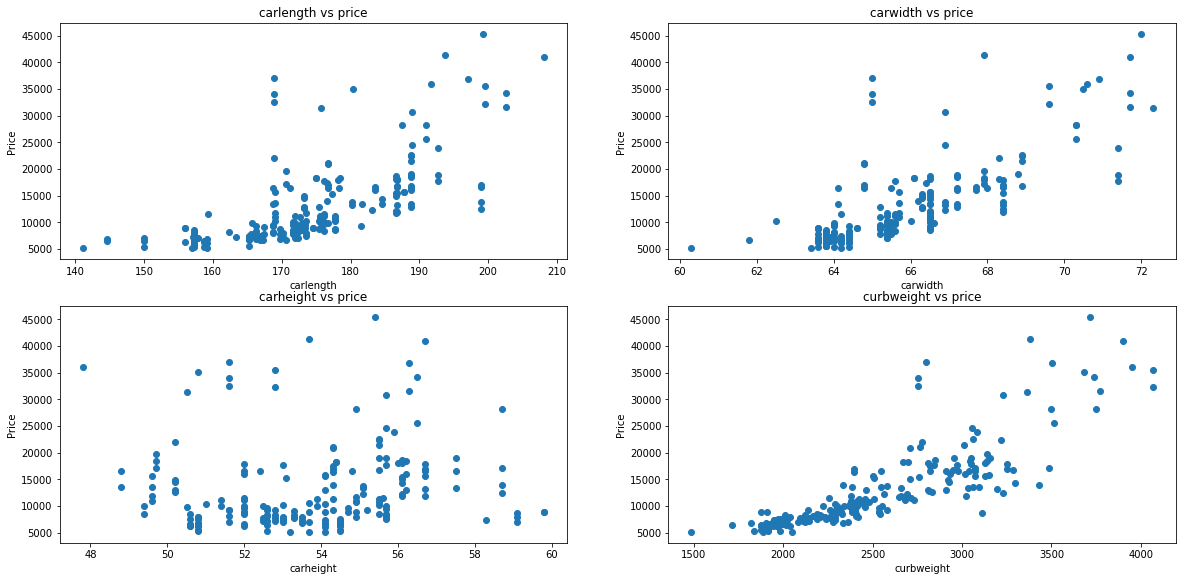

In [128]:
def car_dim(x, fig):
    plt.subplot(4, 2, fig)
    plt.title(x + ' vs price')
    plt.xlabel(x)
    plt.ylabel('Price')
    plt.scatter(cars[x], cars.price)

plt.figure(figsize=(20, 20))

car_dim('carlength', 1)
car_dim('carwidth', 2)
car_dim('carheight', 3)
car_dim('curbweight', 4)

* carheight doesnt seem to have any relation with price
* carlength, curbweight, carwidth have pos corr with price

C:\Python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


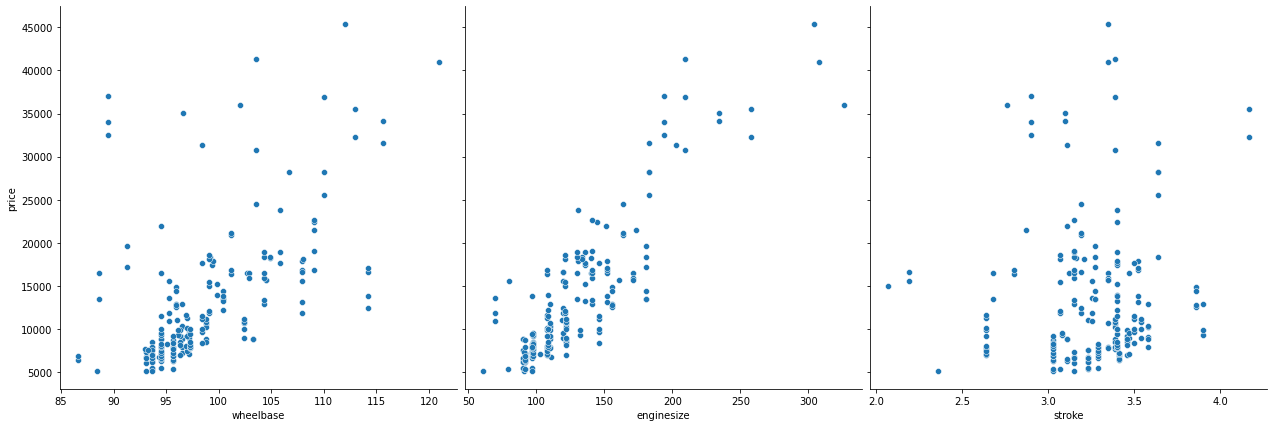

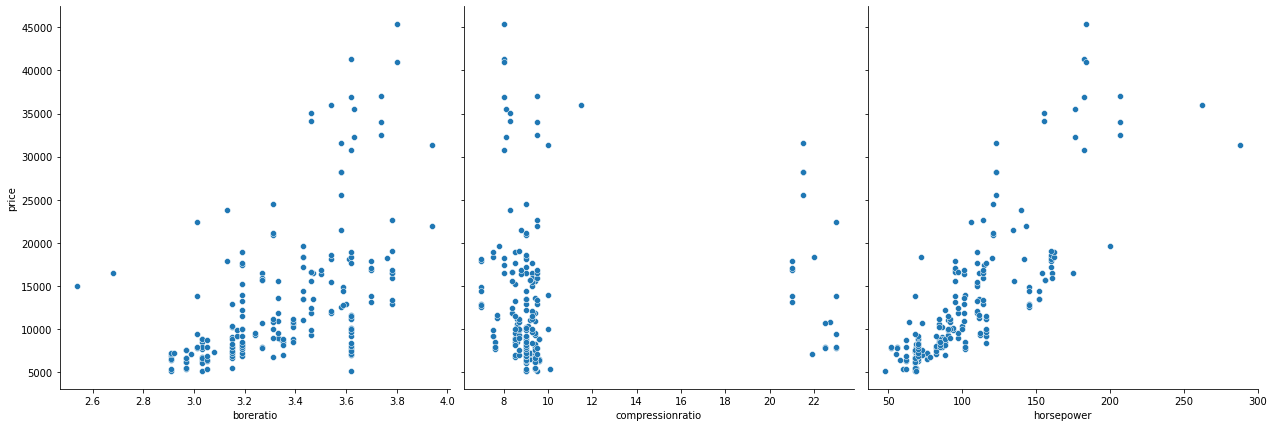

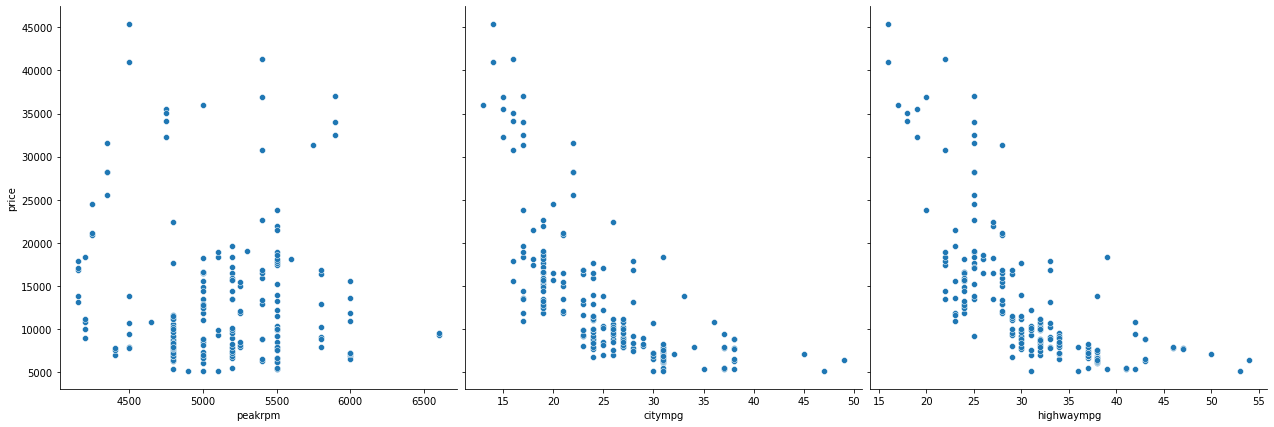

In [134]:
def pair_plot(x, y, z):
    sns.pairplot(cars, x_vars = [x, y, z], y_vars = 'price', size = 6, aspect = 1, kind = 'scatter')
    
pair_plot('wheelbase', 'enginesize', 'stroke')
pair_plot('boreratio', 'compressionratio', 'horsepower')
pair_plot('peakrpm', 'citympg', 'highwaympg')

C:\Python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'city and highway mpg vs price along with distribution of fueltype')

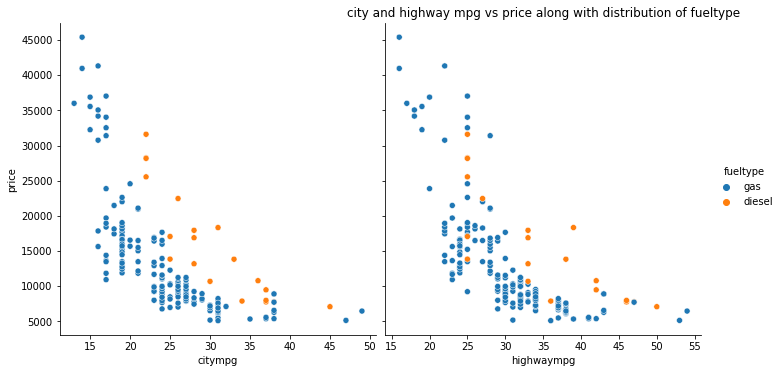

In [136]:
sns.pairplot(cars, x_vars = ['citympg', 'highwaympg'], y_vars = 'price', size = 5, hue = 'fueltype', kind = 'scatter')
plt.title('city and highway mpg vs price along with distribution of fueltype')

In [183]:
cars['fuelEco'] = (0.55 * cars.citympg + 0.45 * cars.highwaympg)

In [143]:
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuelEco
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80


In [177]:
cars = pd.read_csv('CarPrice_Assignment.csv')

cars_lr = cars

In [184]:
cars_lr.drop(columns = ['car_ID', 'fuelsystem','CompanyName', 'peakrpm', 'compressionratio', 'carheight', 'doornumber', 'highwaympg', 'citympg'])

,symboling,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,horsepower,price,fuelEco
0,3,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,3.47,2.68,111,13495.0,23.70
1,3,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,3.47,2.68,111,16500.0,23.70
2,1,gas,std,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,2.68,3.47,154,16500.0,22.15
3,2,gas,std,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,3.19,3.40,102,13950.0,26.70
4,2,gas,std,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,3.19,3.40,115,17450.0,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,sedan,rwd,front,109.1,188.8,68.9,2952,ohc,four,141,3.78,3.15,114,16845.0,25.25
201,-1,gas,turbo,sedan,rwd,front,109.1,188.8,68.8,3049,ohc,four,141,3.78,3.15,160,19045.0,21.70
202,-1,gas,std,sedan,rwd,front,109.1,188.8,68.9,3012,ohcv,six,173,3.58,2.87,134,21485.0,20.25
203,-1,diesel,turbo,sedan,rwd,front,109.1,188.8,68.9,3217,ohc,six,145,3.01,3.40,106,22470.0,26.45


## DUMMY VARIABLES

Dummy variables, also known as indicator variables, are binary variables that are used to represent categorical variables as numerical values in statistical models. They are created to convert categorical variables into a format that can be used as input for various machine learning algorithms.

In the context of creating dummy variables, each category of a categorical variable is represented by a separate binary variable. These binary variables take the value 0 or 1, indicating the absence or presence of a particular category, respectively.

In [185]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginelocation', cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)

In [186]:
cars_lr.drop(columns = ['car_ID', 'CompanyName'])

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuelEco,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,3,two,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3,two,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,two,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,2,four,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,2,four,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,four,109.1,188.8,68.9,55.5,2952,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,25.25,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
201,-1,four,109.1,188.8,68.8,55.5,3049,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,21.70,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
202,-1,four,109.1,188.8,68.9,55.5,3012,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,20.25,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
203,-1,four,109.1,188.8,68.9,55.5,3217,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,26.45,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [189]:
cars_lr.head()

,car_ID,symboling,CompanyName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuelEco,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,1,3,alfa-romero,two,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,3,alfa-romero,two,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,1,alfa-romero,two,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,4,2,audi,four,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,5,2,audi,four,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [204]:
cars_lr = cars_lr.drop(columns = ['carheight'])

In [205]:
cars_lr.head()

,symboling,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fuelEco,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,3,88.6,168.8,64.1,2548,130,3.47,2.68,9.0,111,5000,13495.0,23.70,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3,88.6,168.8,64.1,2548,130,3.47,2.68,9.0,111,5000,16500.0,23.70,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,94.5,171.2,65.5,2823,152,2.68,3.47,9.0,154,5000,16500.0,22.15,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,2,99.8,176.6,66.2,2337,109,3.19,3.40,10.0,102,5500,13950.0,26.70,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,2,99.4,176.6,66.4,2824,136,3.19,3.40,8.0,115,5500,17450.0,19.80,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [294]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(cars_lr, test_size = 0.5, random_state = 100)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'fuelEco']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [295]:
df_train.head()

,symboling,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fuelEco,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
25,1,93.7,157.3,63.8,1989,90,2.97,3.23,9.40,68,5500,6692.000,34.15,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
21,1,93.7,157.3,63.8,1876,90,2.97,3.23,9.41,68,5500,5572.000,38.80,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
48,0,113.0,199.6,69.6,4066,258,3.63,4.17,8.10,176,4750,35550.000,16.80,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
9,0,99.5,178.2,67.9,3053,131,3.13,3.40,7.00,160,5500,17859.167,18.70,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
23,1,93.7,157.3,63.8,2128,98,3.03,3.39,7.60,102,5500,7957.000,26.70,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

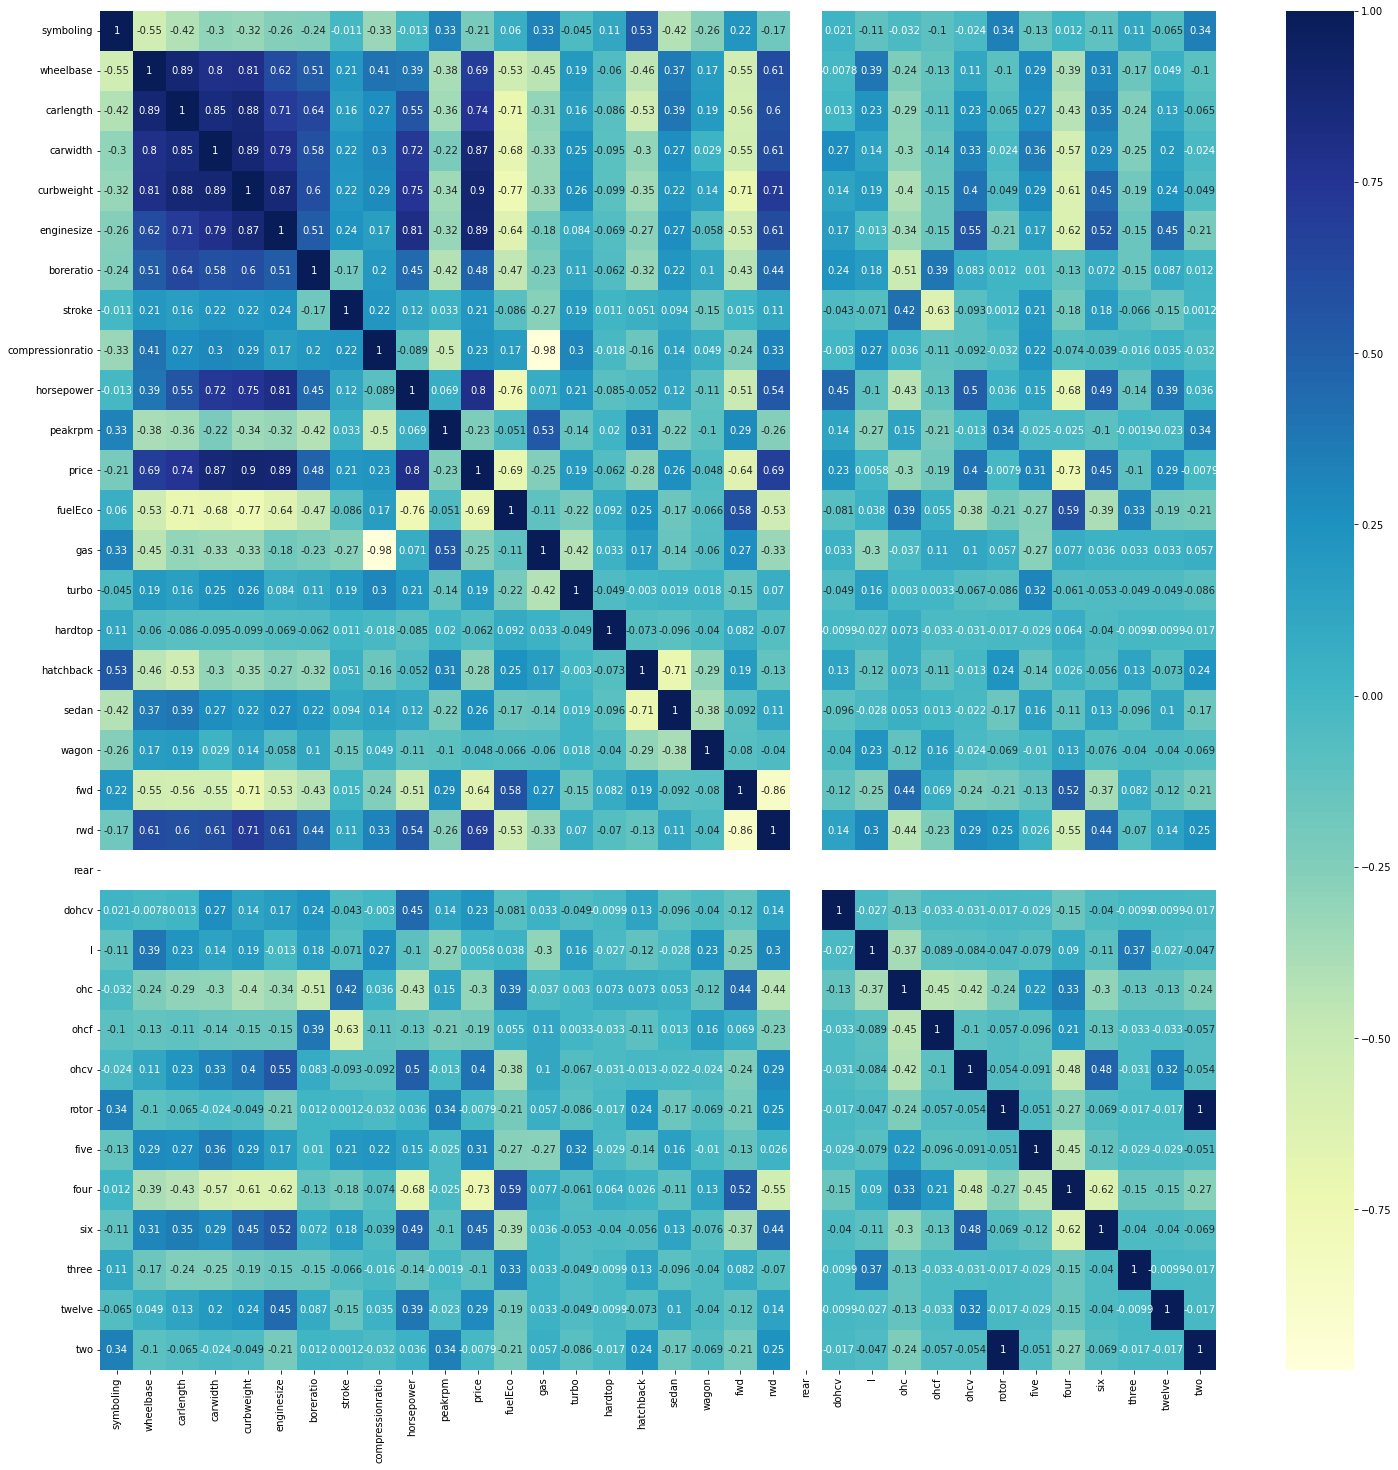

In [296]:
plt.figure(figsize = (25, 25))

sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')

wheelbase carlength carwidth curbweight enginesize boreratio horsepower fuelEco rwd fwd four six

In [297]:
y_train = df_train['price']
df_train = df_train[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'fuelEco', 'rwd', 'fwd', 'four', 'six', 'price']]


In [298]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,fuelEco,rwd,fwd,four,six,price
25,93.7,157.3,63.8,1989,90,2.97,68,34.15,0,1,1,0,6692.000
21,93.7,157.3,63.8,1876,90,2.97,68,38.80,0,1,1,0,5572.000
48,113.0,199.6,69.6,4066,258,3.63,176,16.80,1,0,0,1,35550.000
9,99.5,178.2,67.9,3053,131,3.13,160,18.70,0,0,0,0,17859.167
23,93.7,157.3,63.8,2128,98,3.03,102,26.70,0,1,1,0,7957.000


In [299]:
x_train = df_train.iloc[: , :12]
y_train = df_train['price']

In [300]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [301]:
m = mlr.coef_
c = mlr.intercept_

print(" coeff: ", m ," intercept: ", c )

 coeff:  [ 8.75624917e+01 -3.97917536e+01  9.40300070e+02  2.10020445e+00
  6.92938296e+01 -1.49436588e+03  1.27043612e+01  2.80979465e+01
  7.16767270e+02 -9.93160350e+02 -3.80579450e+03 -2.25028099e+03]  intercept:  -58682.07694395315


In [307]:
new_Data = [[99.5,178.2,67.9,3053,131,3.13,160,18.70,0,0,0,0]]
mlr.predict(new_Data)

C:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20156.05528208])

In [303]:
y_pred_train = mlr.predict(x_train)

In [304]:
from sklearn.metrics import *

r2_score(y_train, y_pred_train)

0.912671137244033